

---


### RainToday Accuracy (in %) : 99.9507718274201


---


### RainTomorrow Accuracy(in %): 79.8691937128591


---



In [0]:
import seaborn as sb
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
%matplotlib inline

sb.set_style('whitegrid')

In [0]:
le = LabelEncoder()
reg = LogisticRegression()
df = pd.read_csv('drive/My Drive/combined_csv.csv')

In [0]:
df['RainToday'] = df['RainToday'].fillna(0)
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].fillna(0)
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['Date'] = pd.to_datetime(df.Date)


In [0]:
df.Location = le.fit_transform(df.Location)
X = df[['MinTemp','MaxTemp','Rainfall']]

df = df.replace(np.nan, 0)
Y = df.RainToday

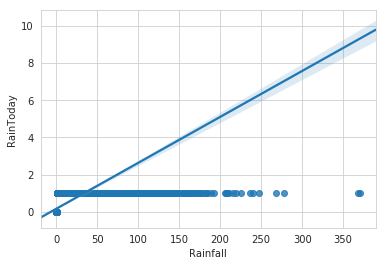

In [0]:
sb.regplot(x="Rainfall",y="RainToday", data=df,scatter=True)

In [0]:
X = scale(X)

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [0]:
reg.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print("RainToday Accuracy(in %):",reg.score(X_test,Y_test)*100) 

RainToday Accuracy(in %): 99.9507718274201


In [0]:
Y = df.RainTomorrow

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

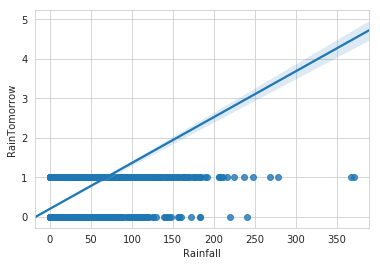

In [0]:
sb.regplot(x="Rainfall",y="RainTomorrow", data=df,scatter=True)

In [0]:
reg.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print("RainTomorrow Accuracy(in %):",reg.score(X_test,Y_test)*100) 

RainTomorrow Accuracy(in %): 79.8691937128591
